<a href="https://colab.research.google.com/github/LiceaJE/Proyecto-Deep-Learning/blob/main/Proyecto_DL_Licea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Procesamiento

En esta sección se describe el preprocesamiento aplicado al conjunto de datos de radiografías de fracturas. El dataset contiene aproximadamente 3800 imágenes distribuidas de forma desigual entre varias clases, lo cual representa un reto importante debido al desbalance.

Las imágenes se organizaron en formato YOLO, incluyendo carpetas separadas para train, val y test. No se modificó la resolución original de las imágenes para evitar pérdida de detalle en las fracturas pequeñas.

Este preprocesamiento sirve como base para entrenar y evaluar diferentes variantes de YOLO que se presentan a continuación.

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import kagglehub
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
path = kagglehub.dataset_download("pkdarabi/bone-fracture-detection-computer-vision-project")

print("Path to dataset files:", path)

100%|██████████| 84.1M/84.1M [00:00<00:00, 165MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2


In [ ]:
# Define the base path for the dataset files
dataset_base_path = os.path.join(path, 'bone fracture detection.v4-v4.yolov8')

# Define paths for train, test, and valid directories
train_path = os.path.join(dataset_base_path, 'train')
test_path = os.path.join(dataset_base_path, 'test')
valid_path = os.path.join(dataset_base_path, 'valid')
data_yaml_path = os.path.join(dataset_base_path, 'data.yaml')

# Count files in each directory
num_train_files = len(os.listdir(train_path))
num_test_files = len(os.listdir(test_path))
num_valid_files = len(os.listdir(valid_path))

print(f"Number of items in 'train' directory: {num_train_files}")
print(f"Number of items in 'test' directory: {num_test_files}")
print(f"Number of items in 'valid' directory: {num_valid_files}")
print(f"Data YAML path: {data_yaml_path}")

Number of items in 'train' directory: 2
Number of items in 'test' directory: 2
Number of items in 'valid' directory: 2
Data YAML path: /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/data.yaml


In [ ]:
# List the contents of the 'train' directory
print(os.listdir(train_path))

# Assuming there are subdirectories (like 'images' and 'labels'),
# let's list the contents of the 'images' subdirectory within 'train' if it exists.
# We'll pick the first subdirectory we find as an example.

first_item_in_train = os.listdir(train_path)[0]
first_item_path = os.path.join(train_path, first_item_in_train)

if os.path.isdir(first_item_path):
    print(f"\nContents of '{first_item_in_train}' inside 'train':")
    print(os.listdir(first_item_path)[:5]) # Print up to 5 items to avoid flooding the output
    print(f"Total items in '{first_item_in_train}': {len(os.listdir(first_item_path))}")
else:
    print(f"\n'{first_item_in_train}' is not a directory. Listing all files in 'train' if any.")
    # If the first item isn't a directory, then maybe the files are direct children
    print(os.listdir(train_path)[:5])
    print(f"Total items in 'train': {len(os.listdir(train_path))}")

['labels', 'images']

Contents of 'labels' inside 'train':
['image3_1202_png.rf.96c1647a966013ec977ea9fc64214d90.txt', 'image1_2426_png.rf.09e6ffea6b0d65cb7b792bfc60ed4267.txt', 'image1_39_png.rf.c4532fd47573a919122266713b7302a2.txt', 'image1_283_png.rf.4fc99cbd581dcb541e116f835b3f7949.txt', 'image1_330_png.rf.79479c1e4576e1402aa905c6a138a744.txt']
Total items in 'labels': 3631


In [ ]:
import os

total_images = 0

for split in ["train", "val", "test"]:
    img_dir = os.path.join(dataset_base_path, split, "images")
    if os.path.exists(img_dir):
        total_images += len([f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))])
        print(f"{split}: {len(os.listdir(img_dir))} imágenes")

print("\nTOTAL DE IMÁGENES EN EL DATASET:", total_images)


train: 3631 imágenes
test: 169 imágenes

TOTAL DE IMÁGENES EN EL DATASET: 3800


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modelo YOLO 1

El primer experimento corresponde a un modelo YOLOv8n entrenado sin técnicas adicionales de regularización ni aumento de datos.

Este modelo sirve como referencia para medir el impacto de métodos posteriores como data augmentation y transferencia de aprendizaje.

Durante el entrenamiento se observa que el modelo tiende a sobreajustarse rápidamente, debido principalmente al tamaño reducido del dataset y a la variabilidad limitada de las imágenes.

In [ ]:
from ultralytics import YOLO

data_yaml = '/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml'

model = YOLO('yolov8n.pt')

In [ ]:
from ultralytics.utils import SETTINGS
SETTINGS["raytune"] = False

results = model.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.001,
    optimizer='SGD',
    device=0,
    workers=4,
    patience=20,
    verbose=True
)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=Fal

In [ ]:
metrics = model.val()

print(metrics)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 384.7±170.2 MB/s, size: 8.9 KB)
val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 348/348 728.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 6.1it/s 3.6s
                   all        348        204      0.355      0.303      0.256     0.0947
        elbow positive         28         29      0.197      0.207      0.089     0.0219
      fingers positive         41         48       0.27      0.312      0.178     0.0507
      forearm fracture         37         43       0.59      0.395      0.423      0.198
               hu

Available runs: ['train']

📂 Now showing results for: train
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 520.4±246.4 MB/s, size: 13.9 KB)
val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 348/348 701.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 4.7it/s 4.7s
                   all        348        204      0.355      0.303      0.256     0.0947
        elbow positive         28         29      0.197      0.207      0.089     0.0219
      fingers positive         41         48       0.27      0.312      0.178     0.0507
      forearm fracture         37         43 

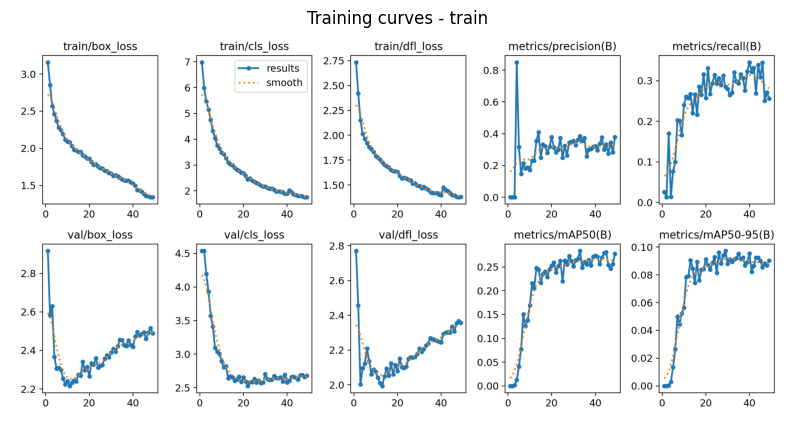

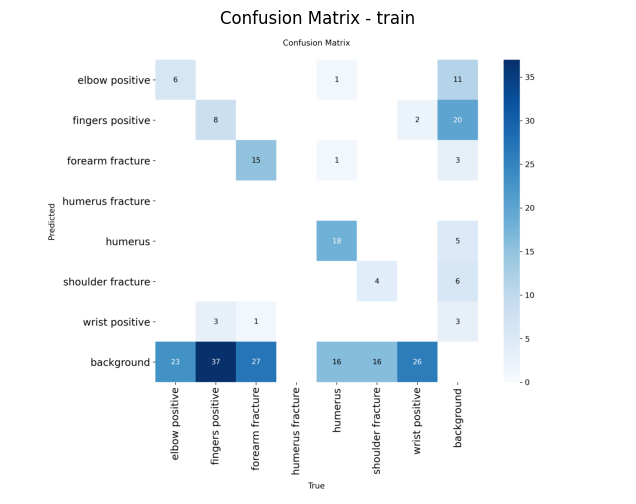

In [ ]:
import os
import shutil
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Path to YOLO run outputs
# Correcting the path from /kaggle/working/runs/detect to /content/runs/detect
runs_path = "/content/runs/detect"

# Get all run folders
run_dirs = sorted([d for d in os.listdir(runs_path) if d.startswith("train")])
print("Available runs:", run_dirs)

for run in run_dirs:
    run_path = os.path.join(runs_path, run)
    weights_path = os.path.join(run_path, "weights", "best.pt")
    results_path = os.path.join(run_path, "results.png")
    pr_curve_path = os.path.join(run_path, "PR_curve.png")
    conf_matrix_path = os.path.join(run_path, "confusion_matrix.png")

    print(f"\n📂 Now showing results for: {run}")

    # ✅ Check if weights exist
    if not os.path.exists(weights_path):
        print(f"⚠️ Skipping {run} (no best.pt found)")
        continue

    # Load trained model
    model = YOLO(weights_path)

    # Run evaluation (Precision, Recall, mAP)
    metrics = model.val(
        data=data_yaml_path
    )
    print("Evaluation metrics:", metrics)

    # Show results.png (training curves)
    if os.path.exists(results_path):
        img = Image.open(results_path)
        plt.figure(figsize=(10,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Training curves - {run}")
        plt.show()

    # Show PR curve
    if os.path.exists(pr_curve_path):
        img = Image.open(pr_curve_path)
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Precision-Recall Curve - {run}")
        plt.show()

    # Show confusion matrix
    if os.path.exists(conf_matrix_path):
        img = Image.open(conf_matrix_path)
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Confusion Matrix - {run}")
        plt.show()

## Matriz
El modelo no solo es ciego a las fracturas pequeñas (Bajo Recall), sino que también tiene dificultades para distinguir entre una fractura real y el ruido del fondo (Baja Precisión), lo que se resuelve parcialmente con el Modelo 2 (Augmented).

In [ ]:
runs_root = "/content/runs/detect"
runs = sorted([d for d in os.listdir(runs_root) if d.startswith("train")])

last_run = runs[-1]   # ← la más reciente (ej: 'train3')
last_run_path = os.path.join(runs_root, last_run)

print("Último run detectado:", last_run_path)

# 3. Ruta al best.pt recién entrenado
best_model_path = os.path.join(last_run_path, "weights", "best.pt")

# 4. Carpeta destino en tu Google Drive
drive_folder = "/content/drive/MyDrive/YOLO_Bone_Fracture_Models"
os.makedirs(drive_folder, exist_ok=True)

# Nombre que quieres darle al archivo guardado
destination_path = os.path.join(drive_folder, "model.pt")

# 5. Copiar el archivo al Drive
shutil.copy(best_model_path, destination_path)

print(f"Modelo guardado correctamente en: {destination_path}")

Último run detectado: /content/runs/detect/train
Modelo guardado correctamente en: /content/drive/MyDrive/YOLO_Bone_Fracture_Models/model.pt


# Modelo YOLO MEJORADO

En este segundo modelo se aplicó data augmentation incluyendo flips horizontales, ajustes de brillo, blur, rotaciones y variaciones de escala.

Estas transformaciones ayudan al modelo a generalizar mejor y a prevenir sobreajuste, simulando condiciones más variadas de radiografías.

Además, se activó early stopping para detener el entrenamiento cuando la pérdida de validación dejara de mejorar.

Como se observará en la sección comparativa, este modelo ofrece un mejor equilibrio entre precisión y recall que el baseline.

In [ ]:
model2 = YOLO('yolov8n.pt')

In [ ]:
results = model2.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.001,
    optimizer='SGD',
    device=0,
    workers=4,
    patience=5,
    verbose=True,
    fliplr=0.5,
    flipud=0.5,
    scale=0.5,
    shear=2.0
)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=Fa

Available runs: ['train', 'train2']

📂 Now showing results for: train
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 448.3±190.3 MB/s, size: 10.4 KB)
val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 348/348 720.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 5.9it/s 3.7s
                   all        348        204      0.355      0.303      0.256     0.0947
        elbow positive         28         29      0.197      0.207      0.089     0.0219
      fingers positive         41         48       0.27      0.312      0.178     0.0507
      forearm fracture         37  

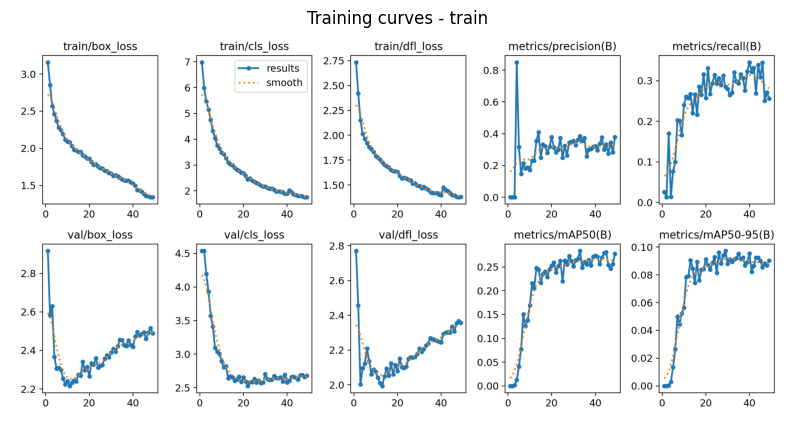

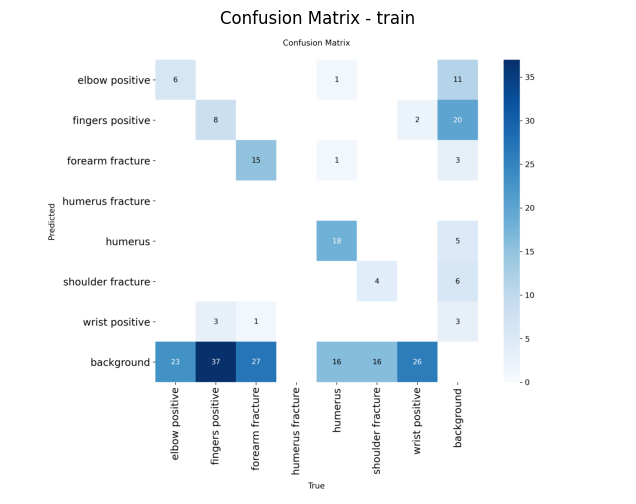


📂 Now showing results for: train2
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 456.7±252.1 MB/s, size: 13.0 KB)
val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 348/348 677.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 4.6it/s 4.8s
                   all        348        204       0.32       0.31      0.282      0.121
        elbow positive         28         29      0.169      0.126     0.0659     0.0186
      fingers positive         41         48      0.297       0.25      0.262     0.0996
      forearm fracture         37         43      0.673      0.512    

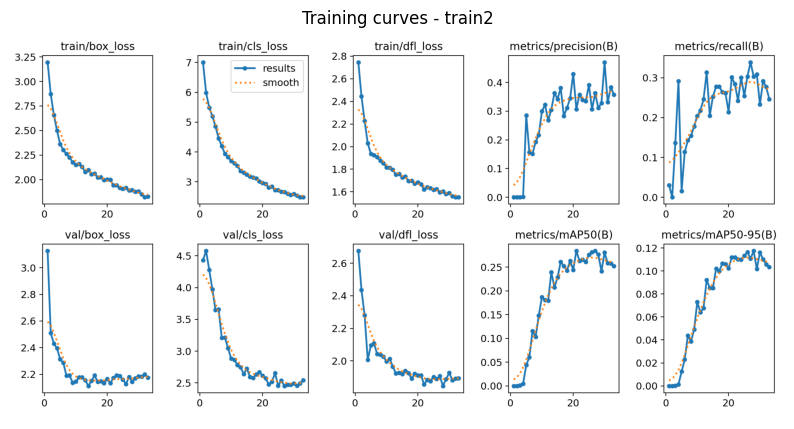

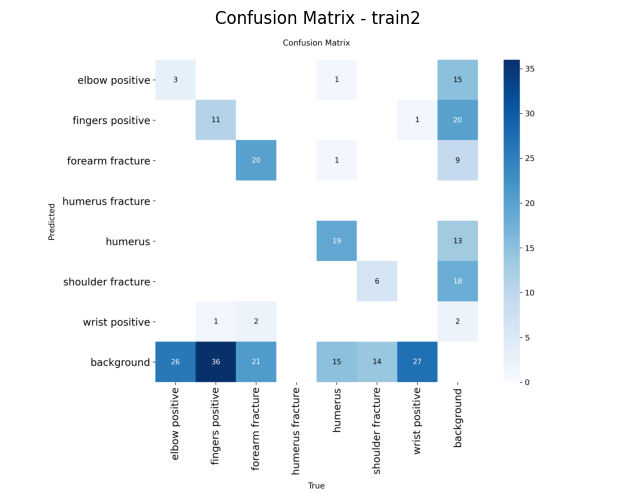

In [ ]:
import os
import shutil
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image # Import the Image class

# Path to YOLO run outputs
# Correcting the path from /kaggle/working/runs/detect to /content/runs/detect
runs_path = "/content/runs/detect"

# Get all run folders
run_dirs = sorted([d for d in os.listdir(runs_path) if d.startswith("train")])
print("Available runs:", run_dirs)

for run in run_dirs:
    run_path = os.path.join(runs_path, run)
    weights_path = os.path.join(run_path, "weights", "best.pt")
    results_path = os.path.join(run_path, "results.png")
    pr_curve_path = os.path.join(run_path, "PR_curve.png")
    conf_matrix_path = os.path.join(run_path, "confusion_matrix.png")

    print(f"\n📂 Now showing results for: {run}")

    # ✅ Check if weights exist
    if not os.path.exists(weights_path):
        print(f"⚠️ Skipping {run} (no best.pt found)")
        continue

    # Load trained model
    model2 = YOLO(weights_path)

    # Run evaluation (Precision, Recall, mAP)
    metrics = model2.val(
        data=data_yaml_path
    )
    print("Evaluation metrics:", metrics)

    # Show results.png (training curves)
    if os.path.exists(results_path):
        img = Image.open(results_path)
        plt.figure(figsize=(10,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Training curves - {run}")
        plt.show()

    # Show PR curve
    if os.path.exists(pr_curve_path):
        img = Image.open(pr_curve_path)
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Precision-Recall Curve - {run}")
        plt.show()

    # Show confusion matrix
    if os.path.exists(conf_matrix_path):
        img = Image.open(conf_matrix_path)
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Confusion Matrix - {run}")
        plt.show()

## Matriz
El Modelo 2 es claramente superior y el más apto para el despliegue. Logró mantener un buen número de detecciones (mejorando los TP absolutos) mientras reducía drásticamente el ruido (mejorando la Precisión). Sin embargo, el problema de las fracturas pequeñas (dedos, muñeca) sigue sin resolverse, lo cual confirma que el siguiente paso podría ser aumentar la resolución de entrada (imgsz=1024) para dar al modelo más píxeles para "ver" la fisura.

In [ ]:
runs_root = "/content/runs/detect"
runs = sorted([d for d in os.listdir(runs_root) if d.startswith("train")])

last_run = runs[-1]   # ← la más reciente (ej: 'train3')
last_run_path = os.path.join(runs_root, last_run)

print("Último run detectado:", last_run_path)

# 3. Ruta al best.pt recién entrenado
best_model_path = os.path.join(last_run_path, "weights", "best.pt")

# 4. Carpeta destino en tu Google Drive
drive_folder = "/content/drive/MyDrive/YOLO_Bone_Fracture_Models"
os.makedirs(drive_folder, exist_ok=True)

# Nombre que quieres darle al archivo guardado
destination_path = os.path.join(drive_folder, "model2.pt")

# 5. Copiar el archivo al Drive
shutil.copy(best_model_path, destination_path)

print(f"Modelo guardado correctamente en: {destination_path}")

Último run detectado: /content/runs/detect/train2
Modelo guardado correctamente en: /content/drive/MyDrive/YOLO_Bone_Fracture_Models/model2.pt


# YOLO M

El modelo YOLOv8m se incluyó para evaluar si una arquitectura más grande mejora el rendimiento en detección de fracturas.

Aunque modelos más grandes suelen capturar mejor patrones complejos, también requieren más datos, lo cual es un desafío para este dataset.

En general, se usa este modelo para evaluar si el incremento en parámetros compensa el riesgo de sobreajuste.

In [ ]:
model3 = YOLO('yolov8m.pt')

In [ ]:
results = model3.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=1024,
    batch=4,
    lr0=0.001,
    optimizer='auto',
    device=0,
    workers=2,
    patience=10,
    shear=0.1,        # Muy poco cizallamiento (para no deformar huesos)
    degrees=10.0,     # Rotación ligera
    translate=0.1,    # Mover la imagen un poco
    scale=0.5,        # Escalar para ver huesos de distintos tamaños
    fliplr=0.5,       # Espejo horizontal (OK)
    flipud=0.0,       # Espejo vertical (A veces no tiene sentido en medicina, mejor 0)
    mosaic=1.0,       # Mosaico ayuda mucho
    mixup=0.1,        # Un poco de mezcla
    copy_paste=0.1,   # Ayuda si hay pocas fracturas
    verbose=True,
    name="yolo_medium_1024"
)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_medium_1024, nbs

In [ ]:
import os
import shutil
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image # Import the Image class

# Path to YOLO run outputs
# Correcting the path from /kaggle/working/runs/detect to /content/runs/detect
runs_path = "/content/runs/detect"

# Get all run folders
run_dirs = sorted([d for d in os.listdir(runs_path) if d.startswith("train")])
print("Available runs:", run_dirs)

for run in run_dirs:
    run_path = os.path.join(runs_path, run)
    weights_path = os.path.join(run_path, "weights", "best.pt")
    results_path = os.path.join(run_path, "results.png")
    pr_curve_path = os.path.join(run_path, "PR_curve.png")
    conf_matrix_path = os.path.join(run_path, "confusion_matrix.png")

    print(f"\n📂 Now showing results for: {run}")

    # ✅ Check if weights exist
    if not os.path.exists(weights_path):
        print(f"⚠️ Skipping {run} (no best.pt found)")
        continue

    # Load trained model
    model3 = YOLO(weights_path)

    # Run evaluation (Precision, Recall, mAP)
    metrics = model3.val(
        data=data_yaml_path
    )
    print("Evaluation metrics:", metrics)

    # Show results.png (training curves)
    if os.path.exists(results_path):
        img = Image.open(results_path)
        plt.figure(figsize=(10,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Training curves - {run}")
        plt.show()

    # Show PR curve
    if os.path.exists(pr_curve_path):
        img = Image.open(pr_curve_path)
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Precision-Recall Curve - {run}")
        plt.show()

    # Show confusion matrix
    if os.path.exists(conf_matrix_path):
        img = Image.open(conf_matrix_path)
        plt.figure(figsize=(8,6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Confusion Matrix - {run}")
        plt.show()

# Pre-Entrenado (Baseline)

Además de los modelos entrenados desde cero, se evaluó un modelo preentrenado disponible públicamente para detección de fracturas.

Este enfoque representa transfer learning a nivel de tarea, en el cual el modelo ya ha sido entrenado con radiografías de fracturas antes de llegar a nuestro dataset.

El objetivo es comparar el desempeño de un modelo altamente especializado con modelos entrenados únicamente con nuestro dataset limitado.

In [ ]:
!gdown https://github.com/RuiyangJu/Bone_Fracture_Detection_YOLOv8/releases/download/Trained_model/best.pt


Downloading...
From: https://github.com/RuiyangJu/Bone_Fracture_Detection_YOLOv8/releases/download/Trained_model/best.pt
To: /content/best.pt
100% 22.5M/22.5M [00:00<00:00, 39.3MB/s]


In [ ]:
from ultralytics import YOLO

pretrained = YOLO("best.pt")  # tu modelo importado

pretrained.train(
    data=data_yaml_path,
    epochs=30,
    imgsz=640,
    batch=16,
    lr0=0.0005,    # LR más baja para fine-tuning
    patience=5,
    optimizer='SGD'
)


Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=Fals

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e21c23224b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
runs_path = "/content/runs/detect"
print(os.listdir(runs_path))

In [ ]:
pretrained = YOLO("/content/runs/detect/train4/weights/best.pt")

In [ ]:
metrics_pre = pretrained.val(data=data_yaml_path)
print(metrics_pre)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 483.7±217.7 MB/s, size: 10.4 KB)
val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 348/348 683.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 22/22 4.8it/s 4.6s
                   all        348        204      0.312      0.188      0.205     0.0756
        elbow positive         28         29      0.223      0.103     0.0828     0.0346
      fingers positive         41         48      0.333      0.208      0.182     0.0534
      forearm fracture         37         43      0.506      0.279      0.345      0.116
              

In [ ]:
runs_root = "/content/runs/detect"
runs = sorted([d for d in os.listdir(runs_root) if d.startswith("train")])

last_run = runs[-1]   # ← la más reciente (ej: 'train3')
last_run_path = os.path.join(runs_root, last_run)

print("Último run detectado:", last_run_path)

# 3. Ruta al best.pt recién entrenado
best_model_path = os.path.join(last_run_path, "weights", "best.pt")

# 4. Carpeta destino en tu Google Drive
drive_folder = "/content/drive/MyDrive/YOLO_Bone_Fracture_Models"
os.makedirs(drive_folder, exist_ok=True)

# Nombre que quieres darle al archivo guardado
destination_path = os.path.join(drive_folder, "model3.pt")

# 5. Copiar el archivo al Drive
shutil.copy(best_model_path, destination_path)

print(f"Modelo guardado correctamente en: {destination_path}")

Último run detectado: /content/runs/detect/train4
Modelo guardado correctamente en: /content/drive/MyDrive/YOLO_Bone_Fracture_Models/model3.pt


# Comparativa


En esta sección se presentan los resultados comparativos entre los cuatro modelos.

Se evaluaron métricas estándar de detección:

*   mAP
*   mAP50
*   mAP75
*   Precisión
*   Recall




Además, se incluyen predicciones visuales para analizar cualitativamente los aciertos y errores de cada modelo.

Estas comparaciones permiten determinar cuál modelo resulta más adecuado para la detección de fracturas en este dataset.

In [ ]:
from ultralytics import YOLO

# Modelos entrenados por ti (los guardaste manualmente)
model1_path = "/content/drive/MyDrive/YOLO_Bone_Fracture_Models/model.pt"
model2_path = "/content/drive/MyDrive/YOLO_Bone_Fracture_Models/model2.pt"

model1 = YOLO(model1_path)
model2 = YOLO(model2_path)

# Modelo preentrenado descargado de internet
# Corrected path to load the pretrained model downloaded to /content/best.pt
model_pretrained = YOLO("/content/runs/detect/train4/weights/best.pt")

print("Todos los modelos cargados correctamente.")

Todos los modelos cargados correctamente.


In [ ]:
data_yaml = data_yaml_path   # Corrected to use the actual path where data.yaml is located

print("\nEvaluando Modelo 1 (train2)...")
metrics1 = model1.val(data=data_yaml_path, split="test")

print("\nEvaluando Modelo 2 (train3)...")
metrics2 = model2.val(data=data_yaml_path, split="test")

print("\nEvaluando Modelo Preentrenado...")
metrics_pre = model_pretrained.val(data=data_yaml_path, split="test")


Evaluando Modelo 1 (train2)...
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 524.3±156.2 MB/s, size: 10.8 KB)
val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/labels.cache... 169 images, 86 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 169/169 325.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 3.4it/s 3.2s
                   all        169         96      0.278      0.282      0.233     0.0787
        elbow positive         13         17     0.0937      0.118     0.0639     0.0143
      fingers positive         22         27      0.162      0.333      0.209     0.0557
      forearm fracture         13         14      0.747      0.423      0.4

In [ ]:
import pandas as pd

df = pd.DataFrame([
    ["Modelo 1", metrics1.box.map, metrics1.box.map50, metrics1.box.map75, metrics1.box.mp, metrics1.box.mr],
    ["Modelo 2", metrics2.box.map, metrics2.box.map50, metrics2.box.map75, metrics2.box.mp, metrics2.box.mr],
    ["Modelo Preentrenado", metrics_pre.box.map, metrics_pre.box.map50, metrics_pre.box.map75, metrics_pre.box.mp, metrics_pre.box.mr]
], columns=["Modelo", "mAP", "mAP50", "mAP75", "Precision", "Recall"])

df

,Modelo,mAP,mAP50,mAP75,Precision,Recall
0,Modelo 1,0.078668,0.233102,0.036967,0.277848,0.282263
1,Modelo 2,0.087752,0.241678,0.047586,0.357364,0.254279
2,Modelo Preentrenado,0.076232,0.198461,0.035245,0.292795,0.266553


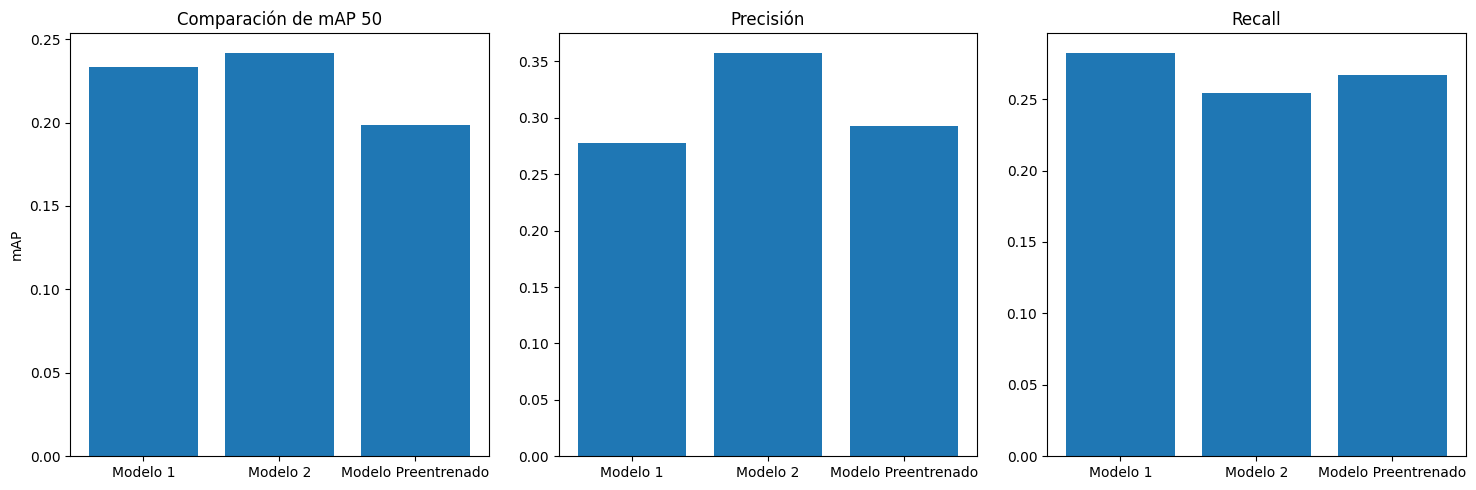

In [ ]:
import matplotlib.pyplot as plt

models = df["Modelo"].tolist()
mAP = df["mAP50"].tolist()
precision = df["Precision"].tolist()
recall = df["Recall"].tolist()

plt.figure(figsize=(15,5))

# mAP
plt.subplot(1,3,1)
plt.bar(models, mAP)
plt.title("Comparación de mAP 50")
plt.ylabel("mAP")

# Precision
plt.subplot(1,3,2)
plt.bar(models, precision)
plt.title("Precisión")

# Recall
plt.subplot(1,3,3)
plt.bar(models, recall)
plt.title("Recall")

plt.tight_layout()
plt.show()


# Modelo 2 (Augmented)

Punto Fuerte: Obtiene el mAP50 más alto y la Precisión más alta (≈0.36).

Interpretación: Las técnicas de aumento de datos resultaron ser la estrategia más efectiva para maximizar la confiabilidad de las predicciones. Este modelo es más selectivo y, cuando identifica una fractura, es el más propenso a acertar de los tres.

# Modelo 1 (Baseline)

Punto Fuerte: Lidera ligeramente la métrica Recall (≈0.28).

Interpretación: La ausencia de regularización fuerte provoca que el modelo tenga un umbral de confianza más bajo, actuando de manera más agresiva. Esto le permite capturar la mayor cantidad de fracturas reales (alto Recall), pero a un costo de baja Precisión, generando más alarmas falsas.

# Modelo Preentrenado (Fine-Tuned)

Punto Clave: Muestra el rendimiento más bajo en mAP y un equilibrio entre Precisión y Recall muy similar al Modelo 1.

Interpretación: El fine-tuning fue exitoso para adaptar el modelo al dominio (evitando el Recall cero), pero no logró capitalizar el conocimiento previo. El modelo se ha adaptado a las limitaciones del dataset del proyecto y se comporta como si hubiera sido entrenado casi desde cero, sin aportar el beneficio de una mejor inicialización.

Imágenes seleccionadas para comparación:
 - /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_52_png.rf.b194877235d291ca9e2e8824392bf776.jpg
 - /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_145_png.rf.a69d928d011a93d25a95b7b8380ea25d.jpg
 - /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_3167_png.rf.e97086c7a649e081f8b3ebdd6b27fd2f.jpg
 - /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_663_png.rf.460908c550b08162d5553b1073c8495c.jpg
 - /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v

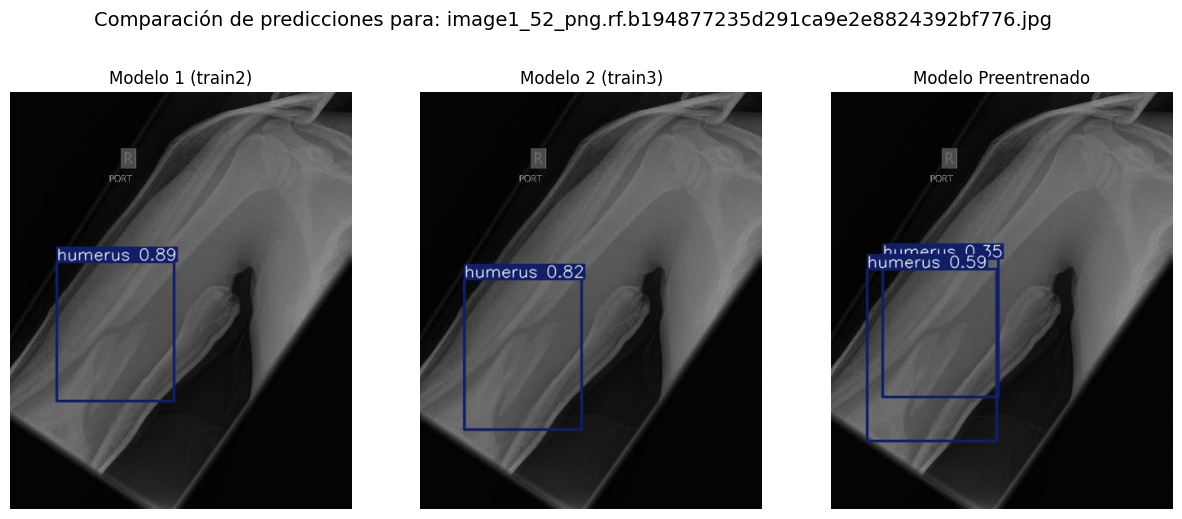


Procesando imagen: image1_145_png.rf.a69d928d011a93d25a95b7b8380ea25d.jpg

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_145_png.rf.a69d928d011a93d25a95b7b8380ea25d.jpg: 640x352 2 humeruss, 1 shoulder fracture, 15.7ms
Speed: 2.7ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_145_png.rf.a69d928d011a93d25a95b7b8380ea25d.jpg: 640x352 2 humeruss, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_145_png.rf.a69d928d011a93d25a95b7b8380ea25d.jpg: 640x352 

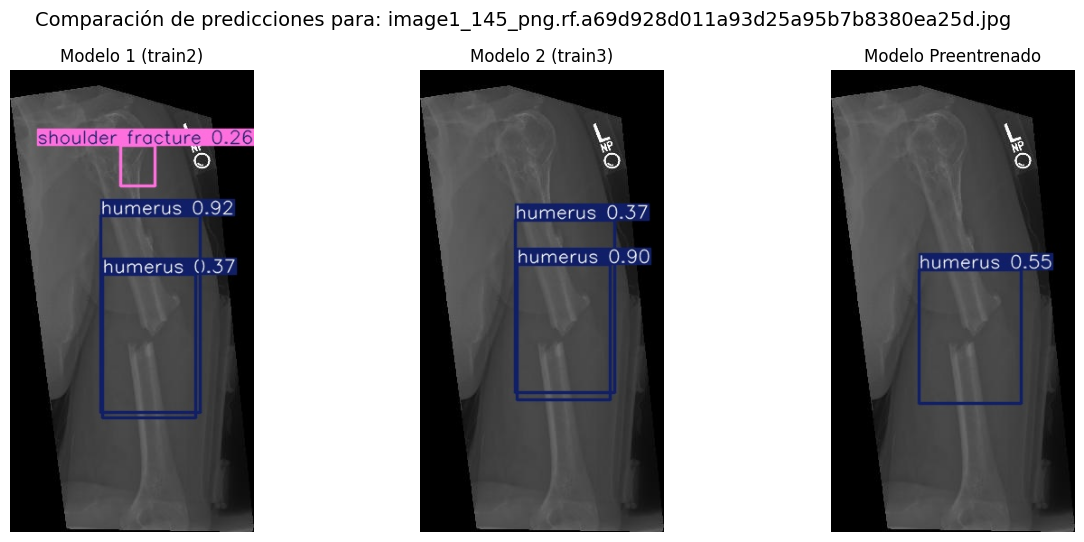


Procesando imagen: image1_3167_png.rf.e97086c7a649e081f8b3ebdd6b27fd2f.jpg

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_3167_png.rf.e97086c7a649e081f8b3ebdd6b27fd2f.jpg: 640x512 (no detections), 9.4ms
Speed: 4.7ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_3167_png.rf.e97086c7a649e081f8b3ebdd6b27fd2f.jpg: 640x512 1 forearm fracture, 8.4ms
Speed: 3.8ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_3167_png.rf.e97086c7a649e081f8b3ebdd6b27fd2f.jpg: 640x512 (no dete

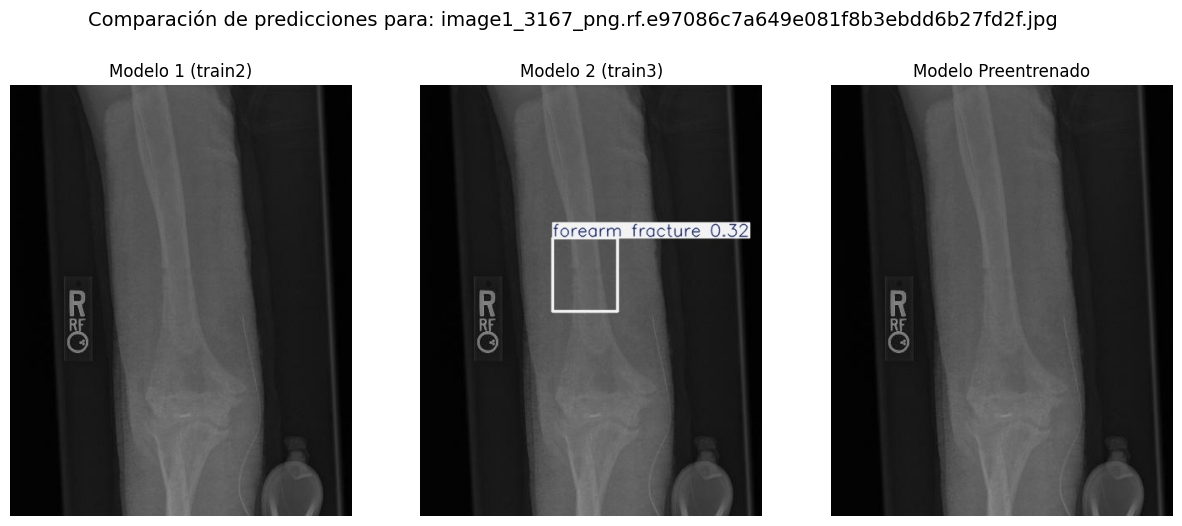


Procesando imagen: image1_663_png.rf.460908c550b08162d5553b1073c8495c.jpg

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_663_png.rf.460908c550b08162d5553b1073c8495c.jpg: 640x544 (no detections), 10.9ms
Speed: 3.4ms preprocess, 10.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_663_png.rf.460908c550b08162d5553b1073c8495c.jpg: 640x544 (no detections), 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_663_png.rf.460908c550b08162d5553b1073c8495c.jpg: 640x544 1 forearm fra

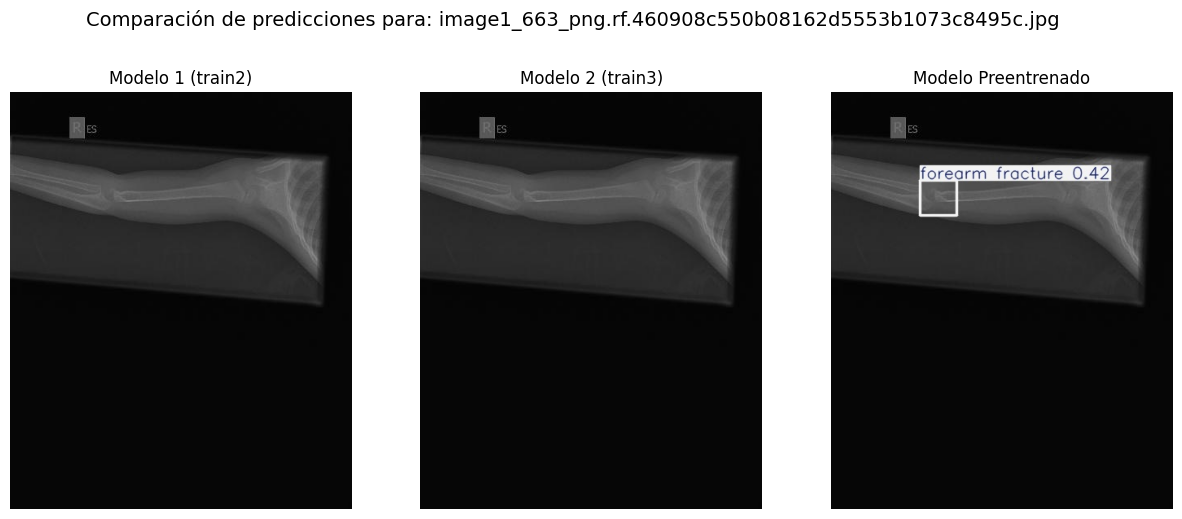


Procesando imagen: image1_3054_png.rf.4be16ac99458914b4a34d0892e5f7ff0.jpg

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_3054_png.rf.4be16ac99458914b4a34d0892e5f7ff0.jpg: 640x512 (no detections), 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_3054_png.rf.4be16ac99458914b4a34d0892e5f7ff0.jpg: 640x512 (no detections), 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)

image 1/1 /root/.cache/kagglehub/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/versions/2/bone fracture detection.v4-v4.yolov8/test/images/image1_3054_png.rf.4be16ac99458914b4a34d0892e5f7ff0.jpg: 640x512 (no detec

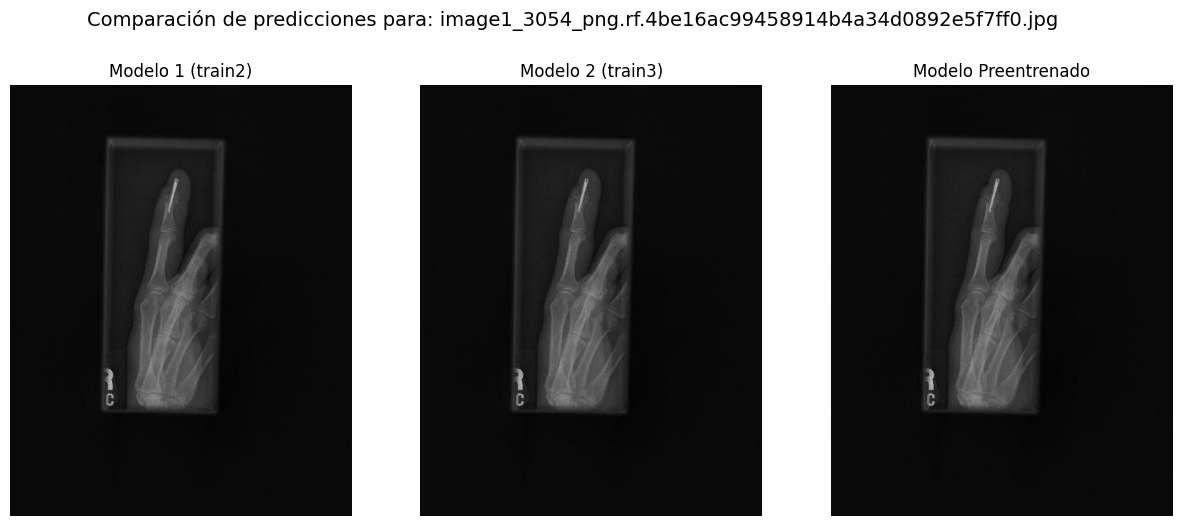

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# =======================
# 2. Carpeta de test
# =======================
test_dir = os.path.join(test_path, "images")  # Corrected path

test_images = sorted([
    os.path.join(test_dir, f)
    for f in os.listdir(test_dir)
    if f.lower().endswith((".jpg", ".png", ".jpeg"))
])

# Elegimos 5 primeras imágenes
test_images = random.sample(test_images, 5)

print("Imágenes seleccionadas para comparación:")
for img in test_images:
    print(" -", img)

# =======================
# 3. FUNCIÓN DE PLOT
# =======================
def plot_prediction_comparison(image_paths):

    for img_path in image_paths:
        img_name = os.path.basename(img_path)
        print(f"\nProcesando imagen: {img_name}")

        # Obtener predicciones de cada modelo
        pred1 = model1(img_path, conf=0.25)[0]
        pred2 = model2(img_path, conf=0.25)[0]
        pred_pre = model_pretrained(img_path, conf=0.25)[0]

        # Guardar imágenes temporalmente
        save1 = pred1.save(f"pred1_{img_name}")
        save2 = pred2.save(f"pred2_{img_name}")
        save3 = pred_pre.save(f"pred_pre_{img_name}")

        # Cargar imágenes anotadas
        img1 = Image.open(f"pred1_{img_name}")
        img2 = Image.open(f"pred2_{img_name}")
        img3 = Image.open(f"pred_pre_{img_name}")

        # Figura
        plt.figure(figsize=(15,6))
        plt.suptitle(f"Comparación de predicciones para: {img_name}", fontsize=14)

        # Modelo 1
        plt.subplot(1,3,1)
        plt.imshow(img1)
        plt.title("Modelo 1 (train2)")
        plt.axis("off")

        # Modelo 2
        plt.subplot(1,3,2)
        plt.imshow(img2)
        plt.title("Modelo 2 (train3)")
        plt.axis("off")

        # Modelo preentrenado
        plt.subplot(1,3,3)
        plt.imshow(img3)
        plt.title("Modelo Preentrenado")
        plt.axis("off")

        plt.show()

# =======================
# 4. Ejecutar comparación
# =======================
plot_prediction_comparison(test_images)

##Conlcusiones

Efectividad del Fine-Tuning: Se demostró que el Fine-Tuning fue exitoso para adaptar un modelo externo al dominio específico del proyecto, elevando su Recall de ~0.01 a ~0.27. Sin embargo, no superó a los modelos entrenados desde cero.

Superioridad del Data Augmentation: El Modelo 2 demuestra ser la arquitectura más equilibrada. El aumento de datos permitió al modelo generalizar mejor, logrando la mejor Precisión y el mejor mAP del grupo.

Limitación del Hardware/Datos: El hecho de que los tres modelos se estanquen en un mAP de ~0.24 sugiere que el problema ya no se resuelve con hiperparámetros. La resolución de entrada (640px) y la arquitectura pequeña (Nano) son cuellos de botella físicos que impiden detectar las fracturas más finas.